# **Sprawozdanie 1**

**Imie i nazwisko:** Kamil Grzegorzewski, 284982

##Zadanie 1 

(z poprzednich cwiczen):
Wysegmentuj kazdy z trzech samochodow. obraz= https://klassikauto.pl/wp-content/uploads/2019/05/zloty_tyt-2.jpg

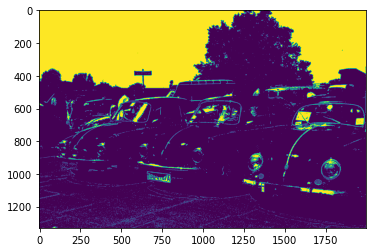

In [404]:
import numpy as np
from skimage import io
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2lab, hsv2rgb
import matplotlib.pyplot as plt
from skimage import data

#Segmentation of car cars[rzedy, kolumny] 
cars = np.array(io.imread('https://sun9-4.userapi.com/impf/oeqlA_1owyig1GKqGCsLIiUOTbSR2_yE6ruH6Q/1LzFwl8yOcY.jpg?size=2000x1330&quality=96&sign=64668aa6f5291b6eb66edc51f83d7a45&type=album'))
#pozbycie się nieba

cars_orig= cars.copy()
plt.imshow(cars[:, :, 2] > 210)
mask = cars[:, :, 2] > 210
cars[mask] = 255


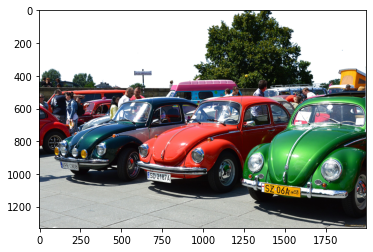

In [405]:
plt.imshow(cars)

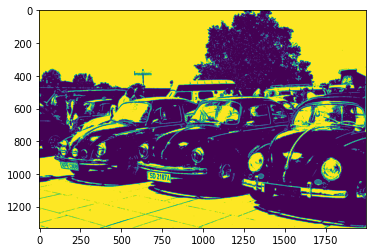

In [406]:
plt.imshow(cars[:, :, 2] > 130)
cars2 = cars.copy()
mask2 = cars2[:, :, 2] > 180
cars2[mask2] = 255

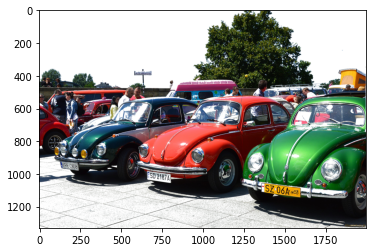

In [407]:
plt.imshow(cars2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


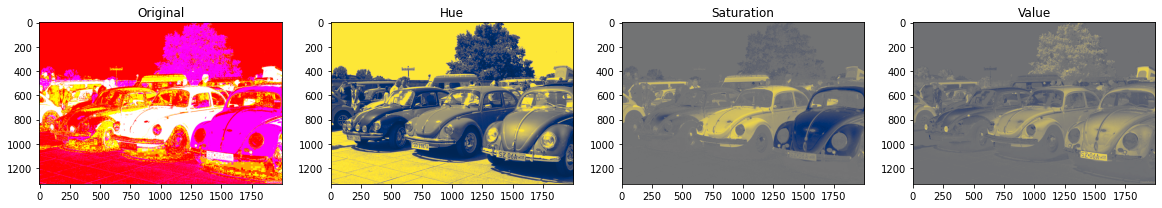

In [408]:
test = rgb2lab(cars2)
fig, ax = plt.subplots(1, 4, figsize = (20,10))
ax[0].imshow(test)
ax[0].set_title('Original')
ax[1].imshow(test[:,:,0], cmap='cividis')
ax[1].set_title('Hue')
ax[2].imshow(test[:,:,1], cmap='cividis')
ax[2].set_title('Saturation')
ax[3].imshow(test[:,:,2], cmap='cividis')
ax[3].set_title('Value');

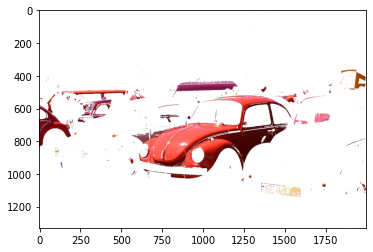

In [409]:
red_car = cars2.copy()
mask3 = test[:,:,1] < 20
red_car[mask3] = 255
plt.imshow(red_car)

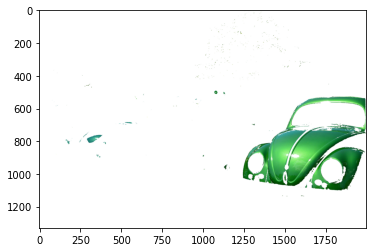

In [410]:
cars4 = cars2.copy()
mask4 = test[:,:,1] > -25
cars4[mask4] = 255
plt.imshow(cars4)

Text(0.5, 1.0, 'Value')

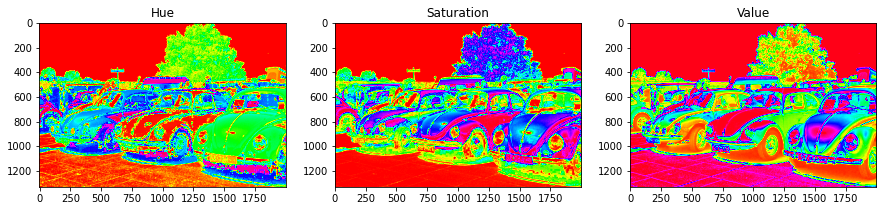

In [411]:
cars5 = rgb2hsv(cars2)
fig, ax = plt.subplots(1, 3, figsize = (15,10))

ax[0].imshow(cars5[:,:,0], cmap='hsv')
ax[0].set_title('Hue')
ax[1].imshow(cars5[:,:,1], cmap='hsv')
ax[1].set_title('Saturation')
ax[2].imshow(cars5[:,:,2], cmap='hsv')
ax[2].set_title('Value')

[11 10 15]


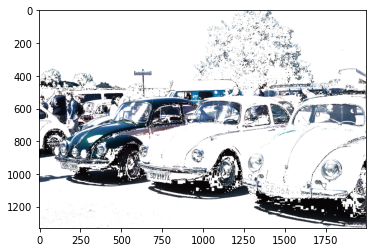

In [412]:
blue_car = cars2.copy()

over_02 = cars5[:,:,0] < 0.50
blue_car[over_02] = 255
anty_red = ~(mask3)
blue_car[anty_red] = 255
#black_mask = blue_car[:, :, 0] <= 8
#blue_car[black_mask] = 255

plt.imshow(blue_car)

print(blue_car[1020, 300])

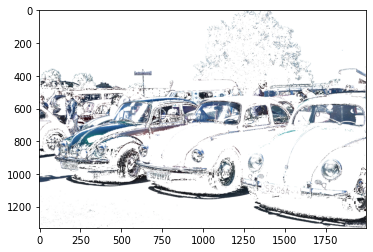

In [413]:
black_mask = blue_car[:, :, 0] <= 15
blue_car[black_mask] = 255

plt.imshow(blue_car)

 wnioski i obserwacje: 
 Zadanie nie należało do najprostszych. Początkowo postanowiłem usunąć powierzchnię oraz niebo, uważając, że pomoże mi to w przyszłych operacjach. Samochód czerwony oraz zielony udało mi się wysegmentować przechodząc do przestrzeni barw Lab nakładając maski z uprzednio wyznaczoną wartością progowania. Dla niebieskiego auta najlepsze efekty uzyskałem w przestrzeni barw HSV, próbowałem także pozbyć się cieni pod autami dla lepszeog efektu segmentacji, ale nie dało to satysfakcjonujących efektów, uzyskałem dodatkowe straty jakości dla niebieskiego auta.

## Zadanie 2

Wysegmenuj naczynia krwionosne wewnatrz galki ocznej

Wysegmentuj naczynia krwionosne wewnatrz galki ocznej


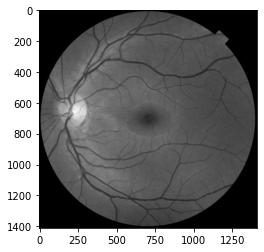

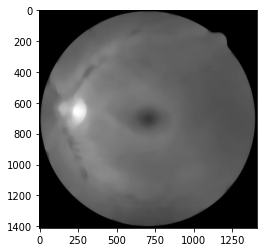

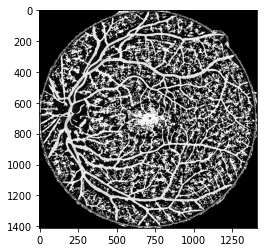

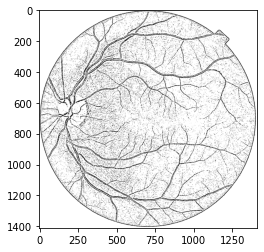

In [414]:
from skimage import io, data
import matplotlib.pyplot as plt
import cv2

image = data.retina()

print("Wysegmentuj naczynia krwionosne wewnatrz galki ocznej")

img = image[:,:,1]

plt.imshow(img, cmap = 'gray')
plt.show()

median = cv2.medianBlur(img,63)
plt.imshow(median, cmap='gray')
plt.show()

wynik = (img - median)
plt.imshow(wynik, cmap='gray')
plt.show()

thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,9,2)
plt.imshow(thresh, cmap='gray')
plt.show() 

 wnioski i obserwacje
 Największą różnicę między tłem a żyłami można zauważyć w zielonej warstwie przestrzeni barw RGB i na tej warstawie będziemy pracować. W pierwszej kolejności wykonałem normalizację obrazu wykorzystując filtr rozmazujący median blue, który oblicza średnią sąsiednich pikseli. Następnie poprzez odjęcie od siebie obrazu po rozmyciu oraz oryginału (w zielonej warstwie) otrzymałem obraz pozbawiony tła, z bardzo dużą ilością żył. Następnie wykorzystując adaptacyjne progowanie uzyskałem efekt ostateczny. Udało się także pozbyć świecącego kształtu z lewej strony. Z rzeczy które bym poprawił to nie udało mi się usunąć mniejszych żył, aby uwydatnić te duże. Dodatkowo możnaby było usunąć okrągły kontur gałki ocznej.

## Zadanie 3

 Opracuj metode do wyzaczania i zliczania liczby kosci na podanych obrazach (ta samam matoda ma dzialac na 2 obrazach):

 Sprawdz nr swojego indeksu:
 - ostatnia cyfra to 0 lub 9
  - obraz a) https://drive.google.com/file/d/162qRwhXWrfOG1vmjE8Lx3cfnzPGXXLzW/view?usp=sharing
  - obraz b) https://drive.google.com/file/d/1APm0prA1H6symwl6Xt3sP9Y5ZyMB4LYk/view?usp=sharing
 - ostatnia cyfra to 1 lub 8
   - obraz a) https://drive.google.com/file/d/1dI3iSkHLNPvaLzMRrbXCYX44fkqSxa5P/view?usp=sharing
   - obraz b) https://drive.google.com/file/d/1eInXEwbrWR9NzqGEP90shHm8jOziU96g/view?usp=sharing
 - ostatnia cyfra to 2 lub 7
  - obraz a) https://drive.google.com/file/d/1inyCwPFAXawfJ6K0Y2gPPtcUzDjAEU32/view?usp=sharing
  - obraz b)https://drive.google.com/file/d/1p7ICs4kJbDGZAFqr3vDM4vckGe25KUPR/view?usp=sharing
 - ostatnia cyfra to 3 lub 6
  - obraz a) https://drive.google.com/file/d/1UnP7f51GpMeskeIDdlID6LhpZcRJxihN/view?usp=sharing
  - obraz b) https://drive.google.com/file/d/19gvnGs3emD_0MCb6AxoA9MWSAShHMZeD/view?usp=sharing
 - ostatnia cyfra to 4 lub 5  
  - obraz a) https://drive.google.com/file/d/1dI3iSkHLNPvaLzMRrbXCYX44fkqSxa5P/view?usp=sharing
  - obraz b) https://drive.google.com/file/d/19gvnGs3emD_0MCb6AxoA9MWSAShHMZeD/view?usp=sharing

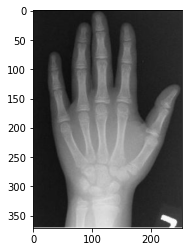

In [415]:
hand1 = np.array(io.imread('/content/reka1.PNG'))
hand2 = np.array(io.imread('/content/reka2.PNG'))

plt.imshow(hand1)

prog:  0.3739276960784314


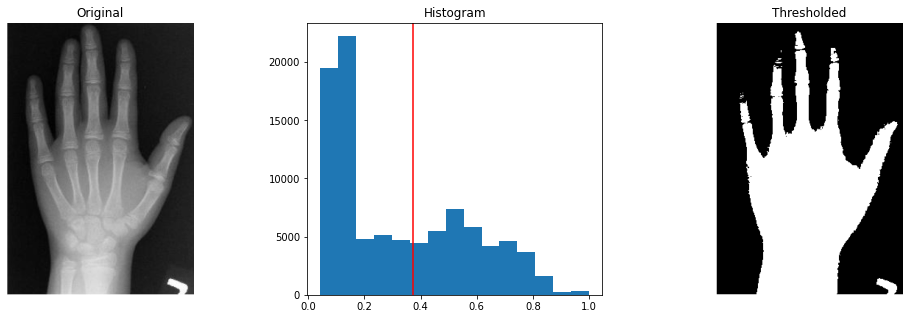

In [443]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, data
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image ,remove_small_holes, remove_small_objects
from skimage.morphology import disk  # noqa


image = rgb2gray(hand1)

thresh = threshold_otsu(image)
print('prog: ', thresh)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(18, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=15)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

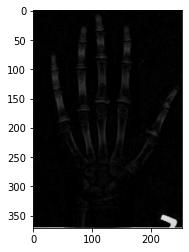

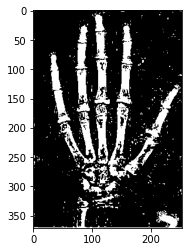

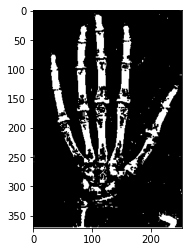

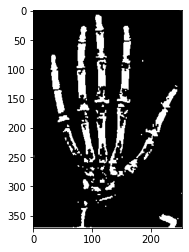

In [444]:
from skimage.segmentation import clear_border
from skimage.filters import try_all_threshold, threshold_mean
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, data
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image ,remove_small_holes, remove_small_objects
from skimage.morphology import disk  # noqa

w_tophat1 = white_tophat(image, disk(7))
plt.imshow(w_tophat1, cmap=plt.cm.gray)
plt.show()

thresh = threshold_mean(w_tophat1)
binary = w_tophat1 > thresh

#binary = w_tophat1  > 0.030

plt.imshow(binary, cmap=plt.cm.gray)
plt.show()

er1 = erosion(binary, disk(1.2))
plt.imshow(er1, cmap=plt.cm.gray)
plt.show()

opened = opening(er1, disk(1.2))
plt.imshow(opened, cmap=plt.cm.gray)
plt.show()



Wykryt  76  obszarow, z czego >= 200 jest  17


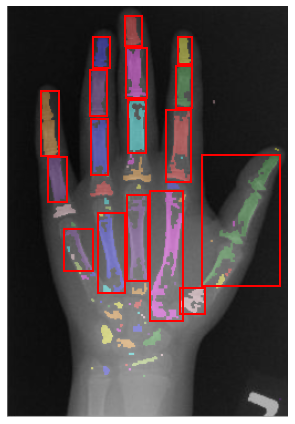

In [445]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

cleared = clear_border(opened)
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image, bg_label=0)

ll=0
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 200:
        ll+=1
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
print("Wykryto ", region.label, " obszarow, z czego >= 200 jest ", ll)
ax.set_axis_off()
plt.tight_layout()
plt.show()

obserwacje i wnioski
Wykorzystane zostały operacje morfologii matematycznych oraz progowania:
- w szczególności przydała się metoda white tophat, dzięki której pozbyłem się elementów, które określały kształt dłoni - zostały same kości.
- progowanie mean thresholding
- operacja erozji i otwarcia

Brakuje lepszego wypełnienia kości bliżej śróddłonia, przez co nie wykrywamy dokładnie kości w tamtym obszarze. Problemem jest także mało zauważalne rozgraniczenia między stawami w paliczkach. Dodatkowo dla drugiej dłoni ten sam algorytm nie działa tak samo dobrze. Chciałbym poświęcić temu zadaniu więcej czasu i doprowadzić do lepszego działania programu, ale praca nad tym problemem jest bardzo czasochłonna :)
